# Simplified 2-Simplex plot

In the `Plot the evolutionary dynamics in a 2-Simplex` example, we show how to use the Simplex2D class to visualize dynamics on a 2 Simplex using arbitrary gradient function (although the examples were shown only for the replicator equation and the Moran process defined in a finite population of strategies). 

However, when we want to use the `replicator_equation` and `StochDynamics` provided in `egttools`, then we can simplify the plotting process by using two utility functions: `egttools.plotting.plot_replicator_dynamics_in_simplex` and `egttools.plotting.plot_pairwise_comparison_rule_dynamics_in_simplex`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from egttools.plotting.simplified import plot_replicator_dynamics_in_simplex, plot_pairwise_comparison_rule_dynamics_in_simplex_without_roots
from egttools.utils import calculate_stationary_distribution

## Evolutionary dynamics in infinite populations

In infinite populations the dynamics are given by the replicator equation. Following we calculate the gradients for all the points in a grid and plot them in a 2-simplex using the Simplex2D class.

We will also be plotting in the simplex the stationary points. We will use black circle to represent stable equilibrium and white circles to represent unstable ones. The arrows indicate the direction of the selective pressure.

### Define payoff matrix

In [3]:
payoffs = np.array([[1, 0, 0],
                    [0, 2, 0],
                    [0, 0, 3]])

In [4]:
type_labels = ['A', 'B', 'C']

### Plot the trajectories from the stationary points

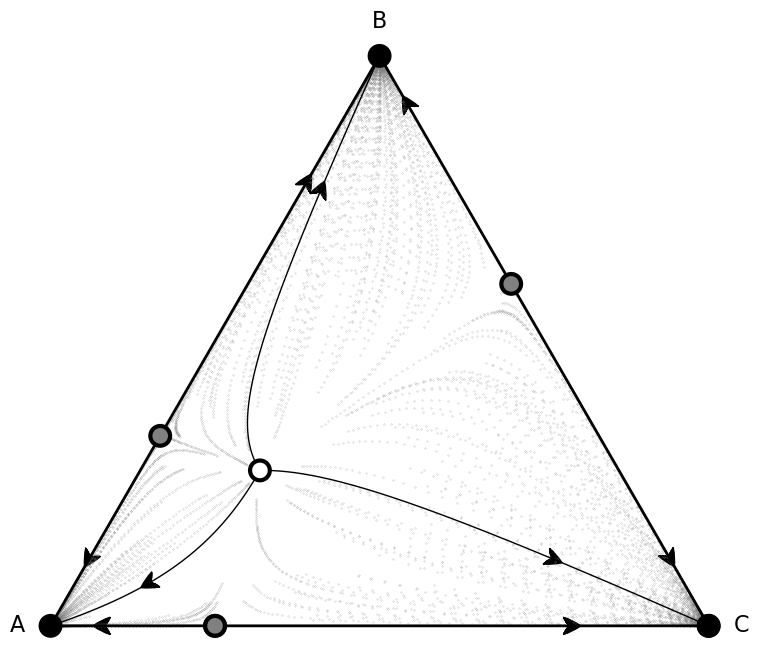

In [5]:
fig, ax = plt.subplots(figsize=(10,8))

simplex, gradient_function, roots, roots_xy, stability = plot_replicator_dynamics_in_simplex(payoffs, ax=ax)

plot = (simplex.draw_triangle()
           .add_vertex_labels(type_labels)
           .draw_stationary_points(roots_xy, stability)
           .draw_trajectory_from_roots(gradient_function, 
                                       roots,
                                       stability,
                                       trajectory_length=15,
                                       linewidth=1,
                                       step=0.01,
                                       color='k', draw_arrow=True, arrowdirection='right', arrowsize=30, zorder=4, arrowstyle='fancy')
           .draw_scatter_shadow(gradient_function, 300, color='gray', marker='.', s=0.1)
          )

ax.axis('off')
ax.set_aspect('equal')

plt.xlim((-.05,1.05))
plt.ylim((-.02, simplex.top_corner + 0.05))
plt.show()

### Plot the gradient field using a streamplot

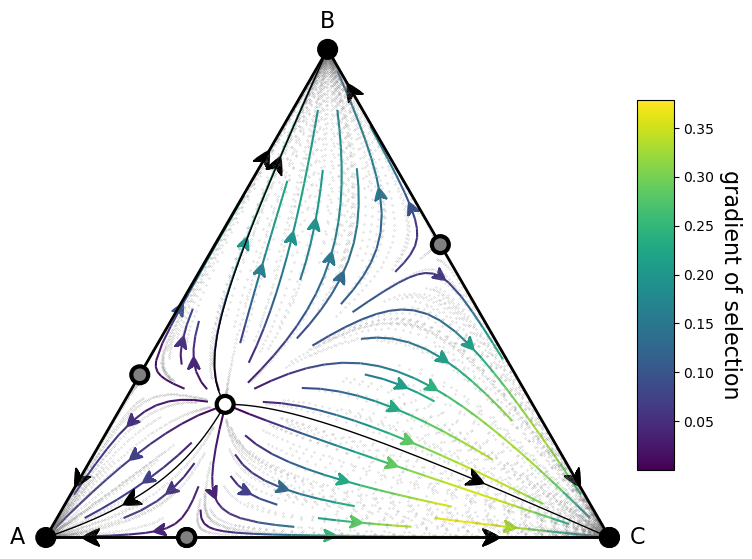

In [6]:
fig, ax = plt.subplots(figsize=(10,8))

plot = (simplex.add_axis(ax=ax)
           .draw_triangle()
           .draw_gradients(zorder=0)
           .add_colorbar()
           .add_vertex_labels(type_labels)
           .draw_stationary_points(roots_xy, stability)
           .draw_trajectory_from_roots(gradient_function, 
                                       roots,
                                       stability,
                                       trajectory_length=15,
                                       linewidth=1,
                                       step=0.01,
                                       color='k', draw_arrow=True, arrowdirection='right', arrowsize=30, zorder=4, arrowstyle='fancy')
           .draw_scatter_shadow(gradient_function, 300, color='gray', marker='.', s=0.1, zorder=0)
          )

ax.axis('off')
ax.set_aspect('equal')

plt.xlim((-.05,1.05))
plt.ylim((-.02, simplex.top_corner + 0.05))
plt.show()

## Stochastic Dynamics in finite populations - Moran process with pairwise comparison

In finite populations we will model the dynamics using a Moran process. The calculation of the gradients is implemented in EGTtools in the StochDynamics class. In this case, since we want to calculate the gradient at any point in the simplex, we will use the `full_gradient_selection` method

### Define the population size and the intensity of selection

In [7]:
Z = 100
beta = 1
mu = 1/Z

### Plot the gradient field and the stationary distribution

We can also plot the stationary distribution inside the simplex. It will give us an idea on where our population is going to spend most of the time

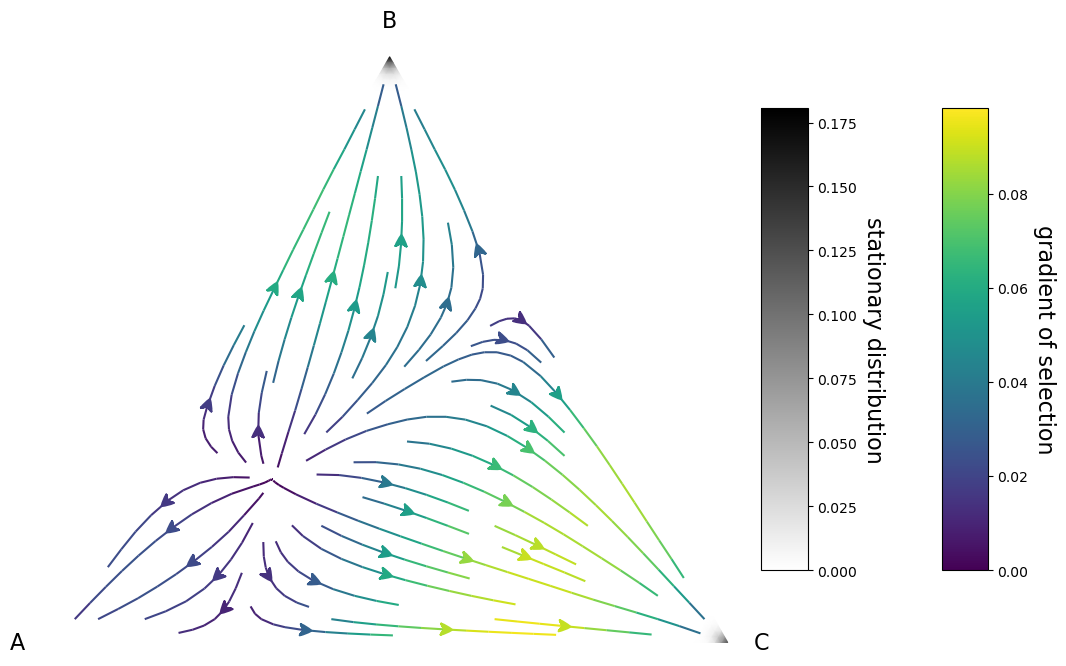

In [11]:
fig, ax = plt.subplots(figsize=(15,10))

simplex, gradient_function, game, evolver = plot_pairwise_comparison_rule_dynamics_in_simplex_without_roots(payoff_matrix=payoffs, population_size=Z, beta=beta, ax=ax)

transitions = evolver.calculate_transition_matrix(beta=beta, mu=mu)
sd = calculate_stationary_distribution(transitions.transpose())

plot = (simplex.add_axis(ax=ax)
           # .draw_triangle()
           .draw_gradients(zorder=5)
           .add_colorbar()
           .add_vertex_labels(type_labels)
           .draw_stationary_distribution(sd, alpha=1, edgecolors='gray', cmap='binary', shading='gouraud', zorder=0)
          )

ax.axis('off')
ax.set_aspect('equal')

plt.xlim((-.05,1.05))
plt.ylim((-.02, simplex.top_corner + 0.05))
plt.show()